In [138]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [139]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


sns.set(style="darkgrid")

In [140]:
data = pd.read_csv("/content/gdrive/MyDrive/banktransaction.csv")

# Data Structure and Content

The dataset consists of 2340 rows and 7 columns. The following table displays the data:

In [141]:
data.head(10)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
5,cash-in,30105,54971,494528,2019-04-06 11:18:00,1,type1
6,cash-in,30105,62257,494528,2019-04-23 08:20:00,1,type1
7,cash-in,30105,1020,494528,2019-07-04 08:59:00,1,type1
8,cash-in,30105,98751,494528,2019-05-06 12:49:00,1,type1
9,cash-in,30105,82016,494528,2019-06-09 12:27:00,1,type1


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


The dataset consists of the following columns:


**typeofaction**: Action type (either "transfer" or "cash-in").

**sourceid**: Source account ID.

**destinationid**: Destination account ID.

**amountofmoney**: Amount of money involved in the transaction.

**date**: Date and time of the transaction.

**isfraud**: Whether the transaction is fraudulent (1 for yes, 0 for no).

**typeoffraud**: Type of fraud ('type1', 'type2', 'type3' if applicable).


In [143]:
data.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object

We converted the 'isfraud' column to boolean and transformed 'date' to datetime. Meanwhile, 'sourceid' and 'destinationid' were changed to categorical types for efficient storage and analysis in the data'

In [144]:
data['isfraud'] = data['isfraud'].astype('bool')
data['date'] = data['date'].apply(pd.to_datetime)
data['sourceid'] = data['sourceid'].astype('category')
data['destinationid'] = data['destinationid'].astype('category')

In [145]:
data.shape

(2340, 7)

In [146]:
data.describe()

,amountofmoney
count,2.340000e+03
mean,2.508583e+06
std,2.560434e+06
min,1.333200e+04
25%,3.359140e+05
50%,1.162354e+06
75%,4.686559e+06
max,7.952497e+06


# Data Cleaning

There are no duplicate rows

In [147]:
data.drop_duplicates(inplace= True)
data.shape

(2340, 7)

There are no missing values

In [148]:
data.isna().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

There are no outliers

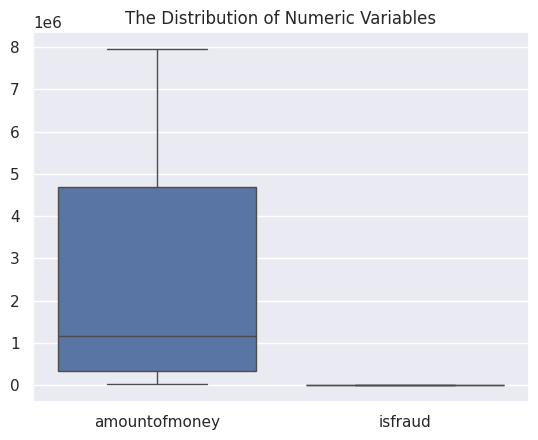

In [149]:
sns.boxplot(data)
plt.title("The Distribution of Numeric Variables")
plt.show()

# Exploratory Data Analysis

After ensuring that the data is clean, we now proceed with exploration and analysis

From the distribution of the amount of money, we observe that the values are very high, peaking at 800 when the amount of money is between 0 and 10,000. After that peak, the distribution, which is right-skewed, decreases sharply until it stabilizes, with most values ranging between 0 and 100

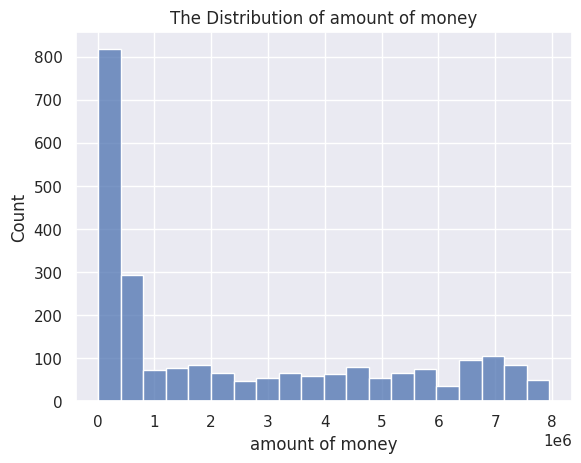

In [150]:
sns.histplot(data['amountofmoney'], bins=20)
plt.title('The Distribution of amount of money')
plt.xlabel('amount of money')
plt.ylabel('Count')
plt.show()

From the bar plot, we observe that most transactions are fraudulent, with a difference of 485

<ipython-input-151-3c67bead5a55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isfraud', data=data,palette='Set2')


Text(0.5, 1.0, 'Count of isfraud')

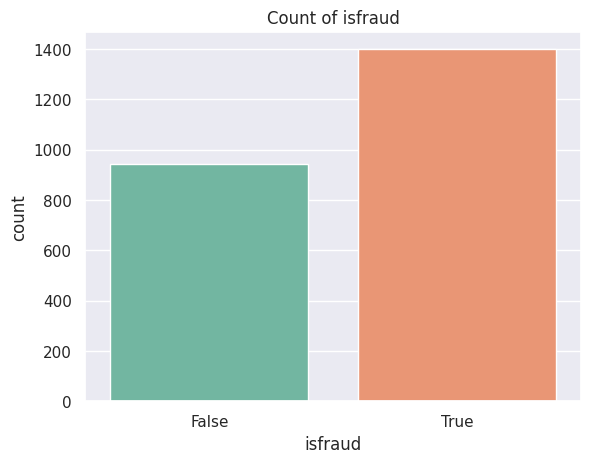

In [151]:
sns.countplot(x='isfraud', data=data,palette='Set2')
plt.title('Count of isfraud')

There are three types of fraud: the most common type is 'type3', followed by 'type2', and then 'type1'

<ipython-input-152-043254b76ea4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='typeoffraud', data=data,palette='Set2')


Text(0.5, 1.0, 'Count of type of fraud')

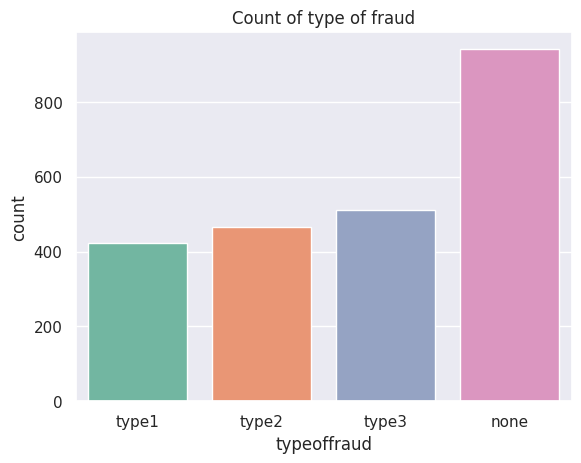

In [152]:
sns.countplot(x='typeoffraud', data=data,palette='Set2')
plt.title('Count of type of fraud')

We conclude from the distribution of the amount of money by date that the values range between 10,000 and 8,000,000, fluctuating over time

<ipython-input-153-a3a7c0cba6f9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='amountofmoney', data=data,palette='Set2')


Text(0.5, 1.0, 'Distribution of the amount of money by date')

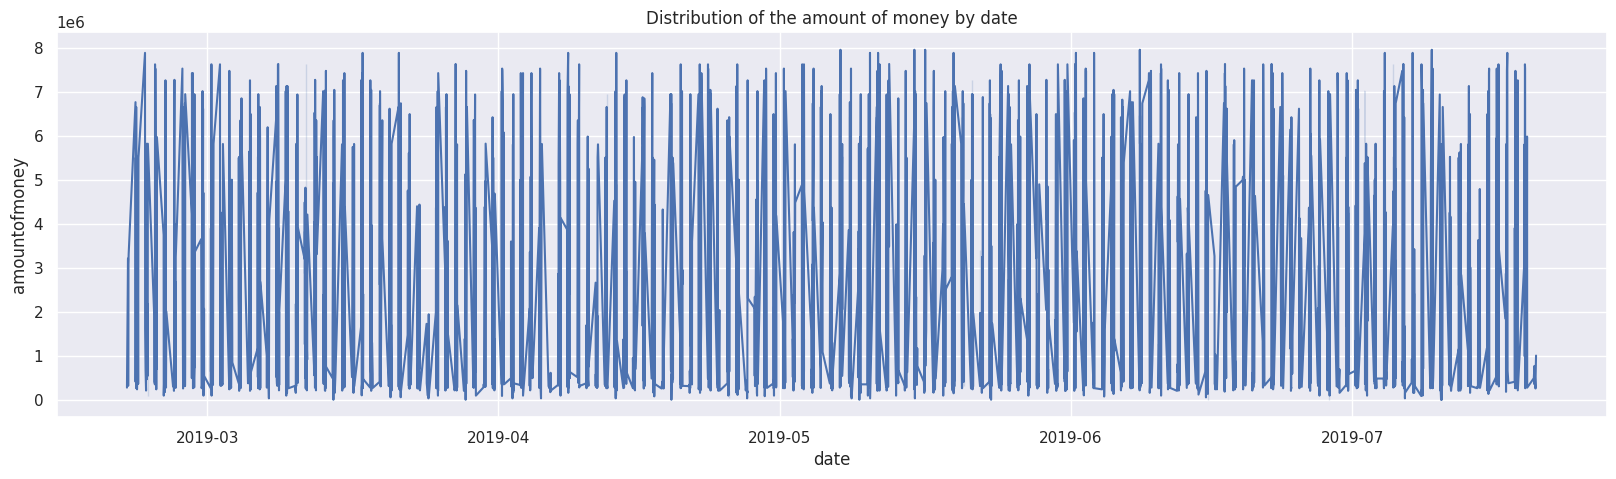

In [153]:
plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='amountofmoney', data=data,palette='Set2')
plt.title('Distribution of the amount of money by date')

We observe from the of Amount of Money with Fraud Status that transactions without fraud are relatively stable. In contrast, most fraudulent transactions occur between 0 and 1,000,000, as well as between 5,000,000 and 8,000,000

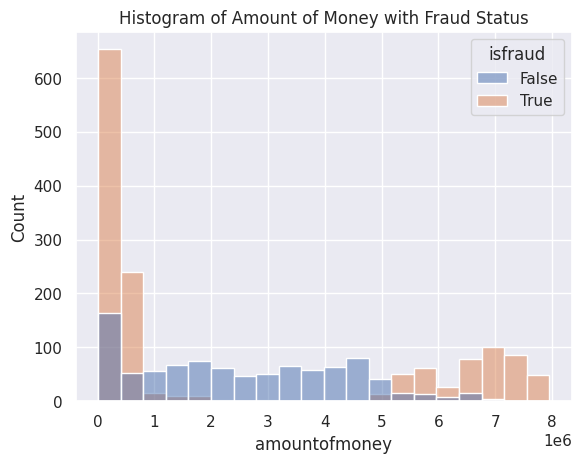

In [154]:
sns.histplot(data=data, x='amountofmoney', bins=20, hue='isfraud')
plt.title('Histogram of Amount of Money with Fraud Status')
plt.show()

From the distribution of types of actions by isfraud below, we conclude that the transfer action is higher than the cash-in action. We also observe that fraudulent transactions outnumber non-fraudulent ones in both actions

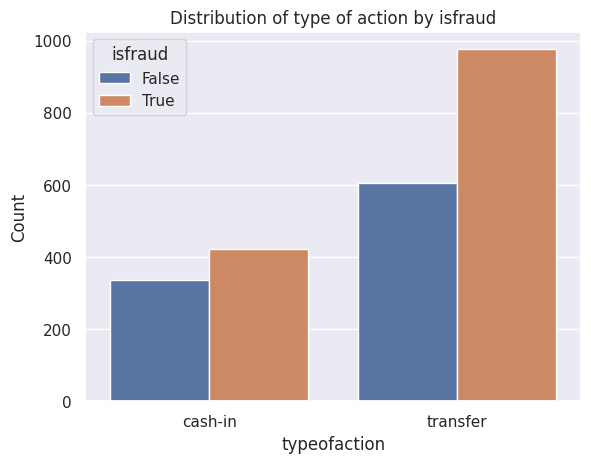

In [155]:
cou=sns.countplot(data=data, x="typeofaction", hue="isfraud")
cou.set_title('Distribution of type of action by isfraud')
plt.ylabel('Count')
plt.show()